|      Course      |            Combinatorial Algorithms           |
| :--------------: | :-------------------------------------------: |
|   **Semester**   |                **2024 Winter**                |
|  **Assignment**  |                    **01**                     |
|    **Group**     |                    **03**                     |
| **Member 01**    |           **999014681 Mingshan, LI**          |
| **Member 02**    |           **999014772 Shunxi, XIAO**          |
| **Member 03**    |           **999022064 Weizhi, LU**            |

# Q1. Knapsack: Bounding Functions and Branch and Bound

1. Implement in Python the algorithm that makes use of the fractional knapsack as a bounding function to further prune the decision tree of the 01-knapsack. 

2. Moreover, using the same bounding function, implement the branch and bound strategy for the 01-knapsack. 

3. Provide test cases to ensure the correctness of your programs. 

4. Report on the comparison of the running times of the backtracking, the bounding, and the branch and bound implementations.

In [87]:
import time
import random
import matplotlib.pyplot as plt
from numpy import dot

## Part 1. Knapsack - General Backtracking

As the starting point of the implementation of other variants backtracking algorithms, it is reasonable to implement the general backtracking solution of 01-knapsack problem at the beginning.

From the materials and refeernces of this coouse, we have the following psuedo code of backtracking algorithm to solve 01-knapsack problem

In [88]:
def knapsack_general(values: list, weights: list, capacity: int) -> list:
    '''
    The general backtracking algorithms solving 01-knapsack problem.
    
    Argumetns:
        - values:   the list of values of items
        - weights:  the list of weights of items
        - capacity: the capacity of knapsack
    Return:
        - optX:     the optimal solution
    '''

    # global variable

    optP = 0        # optimal profit   of 01-knapsack problem
    optX = []       # optimal solution of 01-knapsack problem
    N = len(values) # number of items

    # recursive part

    def knapsack_general_recursive( currX: list = [] ) -> None:
        '''
        The recursive part of general backtracking algorithms solving 01-knapsack problem.
        
        Argumetns:
            - currX: current solution
        '''
        nonlocal optP, optX, N

        '''
        Step 1: Check feasibility of current solution {currX}
        '''    
        if len(currX) == N:
        
            currW = dot(weights, currX) # current weight of current solution {currX}
            currP = dot(values, currX)  # current profit of current solution {currX} 

            # Check whether current solution {currX} is better

            if currW <= capacity and currP > optP:

                optP = currP
                optX = currX[:]

        else:

            '''
            Step 2: Construct the choice set for current solutiuon {currX}
            '''
            choS = [0, 1]

            '''
            Step 3: For each possible next solution, call the algorithm recursively
            '''
            for x in choS:
                
                knapsack_general_recursive( currX + [x] )

    knapsack_general_recursive( [] )

    return optX

Next, we check the correctness of the general backtracking algorithm `knapsack_general` implemented above.

In [89]:
Capacity = 5
Weights  = [4, 3, 7]
Values   = [1, 2, 3]
Solution = [0, 1, 0]

optX = knapsack_general( Values, Weights, Capacity )

if optX == Solution:
    print("True")
else:
    print("False")

True


## Part 2. Test Cases

File `p1_knapsack_test_cases` is responsible to store all test cases that we are going to run later.

After checking the correctness of `knapsack_general`, it would be convenient if we implement a test cases generator first, with `knapsack_general` generating the solution of each cese.

In [90]:
def knapsack_generate_test_cases(
        fname: str,
        num: int,
        init: int, 
        step: int, 
        minRate: float, 
        maxRate: float, 
        minWeight: int,
        maxWeight: int 
    ) -> None:
    '''
    Generate test cases for 01-knapsack problem in file {fname}.
    
    Arguments:
        - fname:     the name of file that stores all the test cases
        - num:       the number of test cases to generate
        - init:      the initial value of nodes number
        - step:      the step test size is increased each loop
        - minRate:   minimum rate of vi / (2 * wi)
        - maxRate:   maximum rate of vi / (2 * wi)
        - minWeight: minimum of item weight
        - maxWeight: maximum of item weight
    '''
    
    file = open(fname, 'w')

    size  = init    # the size of test case
    count = 0

    while count < num:

        values   = [] # values of items
        weights  = [] # weights of items
        capacity = 0 # capacity of test case

        # 1. Generate weights of items
        for i in range(size):
            weight = random.randint(minWeight, maxWeight)
            weights.append(weight)
        
        # 2. Generate values of items
        for i in range(size):
            minValue = int(2 * weights[i] * minRate)
            maxValue = int(2 * weights[i] * maxRate)
            value = random.randint(minValue, maxValue)
            values.append(value)
        
        # 3. Generate capacity
        weight_sum = 0
        for weight in weights:
            weight_sum += weight
        capacity = weight_sum // 2

        # 4. Generate solution
        solution = knapsack_general(values, weights, capacity)

        # 5. Generate a test case
        case = ''
        case += str(capacity)                + '#'
        case += ' '.join(map(str, values))   + '#'
        case += ' '.join(map(str, weights))  + '#'
        case += ' '.join(map(str, solution))

        if count < num - 1: case += '\n'

        print(case, end='')
        file.write(case)        

        count += 1
        size += step

    file.close()

Then, we can apply this function to generate some test cases.

In [91]:
fname     = 'knapsack_test_cases'
num       = 12 # Number of test cases
init      = 4
step      = 1
maxRate   = 1.3
minRate   = 0.7
minWeight = 2
maxWeight = 9
print('All tests generated:\n')
knapsack_generate_test_cases( fname, num, init, step, minRate, maxRate, minWeight, maxWeight )

All tests generated:

14#17 18 10 19#7 8 6 8#0 0 1 1
19#12 19 15 19 19#6 8 6 9 9#0 0 0 1 1
20#13 17 13 17 8 12#6 8 8 7 4 8#0 1 0 1 1 0
19#9 19 9 4 15 14 4#7 8 4 2 6 9 3#0 1 1 0 1 0 0
21#8 5 10 18 19 7 13 13#4 2 6 7 8 4 6 5#0 0 0 1 1 0 0 1
24#7 9 16 8 9 7 8 10 12#4 7 7 5 4 4 4 5 9#0 0 1 0 1 1 1 1 0
29#21 5 8 17 3 14 15 18 5 11#9 3 4 9 2 7 8 9 3 5#1 0 0 0 0 1 1 0 0 1
30#17 14 14 7 17 10 7 16 2 11 3#7 9 7 5 7 5 3 8 2 6 2#1 0 0 0 1 1 1 1 0 0 0
30#13 18 5 13 20 3 4 8 14 18 4 10#5 8 2 5 9 2 3 5 7 7 3 5#1 0 1 1 1 1 0 0 0 1 0 0
36#7 4 21 5 4 8 10 7 23 12 17 18 20#3 3 9 2 3 4 6 3 9 9 7 7 8#0 0 0 1 0 0 0 1 1 0 1 1 1
44#15 15 11 2 16 6 15 11 8 9 9 8 15 18#9 6 5 2 9 4 8 7 4 7 6 6 8 8#0 1 1 0 1 0 1 0 0 0 0 0 1 1
36#4 3 3 18 19 23 7 5 9 5 10 4 11 4 8#3 2 2 9 8 9 5 2 6 4 5 2 7 3 5#0 0 0 1 1 1 0 1 0 0 1 0 0 1 0

## Part 3. Knapsack - Bounding (Fractional Knapsack)

Thanks to the materials of the course, we already have the implemetation of fraction knapsack as follow.

In [92]:
def fractional(v, w, W) -> list:
    """
    the fractional knapsack

    Arguments:
        - v: the list of values
        - w: the list of weights
        - W: the capacity  
    
    Return:
        - x: optimal fractional solution
    """

    s, v, w = sort(v, w)

    x, c, i = [0]*len(v), W, 0

    while 0 < c and i < len(v):

        x[i] = 1 if w[i] <= c else c/w[i]
        c   -= w[i] * x[i]
        i   += 1

    x = restore(s, x)

    return x

def sort(v, w):
    """
    sort the vectors of values and weights
    by value/weight ratio in decreasing order
    """
    
    z = list(zip(range(len(v)),zip(v, w)))

    z.sort(key=lambda k: (k[1][0]/k[1][1]), reverse=True)

    s, z = zip(*z)

    return s, *map(list,zip(*z))

def restore(s, x):
    """
    in conjunction with sort restores the
    solution x its original order of elements
    """

    z = list(zip(s, x))

    z.sort()

    z, r = map(list,zip(*z))

    return r

Thus, we are able to implement a bounding function with the help of the funcitons mentioned above.

In [93]:
def getBound(values: list, weights: list, capacity: int, currX: list, algo) -> float:
    '''
    Calculate the bound of profit of current solution {currX}.

    Arguments:
        - values:   list of item values
        - weights:  list of item weights
        - capacity: capacity of knapsack
        - currX:    current solution
        - algo:     algorithnm used to calculate the bound
    Return:
        - currP + optP_rX: the bound of the profit for currX
    '''
    N = len(values)
    l = len(currX)
    currX_ = currX + [0] * (N - l)
    currP = dot(values, currX_)  # current profit of current solution {currX} 
    currW = dot(weights, currX_) # current weight of current solution {currX}
    opt_rX = [] if N == l else fractional( values[l:], weights[l:], capacity - currW )
    optP_rX = 0 if N == l else dot( values[l:], opt_rX )
    return currP + optP_rX

Next, with the help of the fractional knapsack as a bounding function, we are able to implement the bounding version of backtracking algorithm solving 01-knapsack problem.

In [94]:
def knapsack_bounding(values: list, weights: list, capacity: int) -> list:
    '''
    The backtracking algorithms solving 01-knapsack problem that makes the 
    use of the fractional knapsack as a bounding function.

    Argumetns:
        - values:   the list of values of items
        - weights:  the list of weights of items
        - capacity: the capacity of knapsack
    Return:
        - optX:     the optimal solution
    '''

    # global variable

    optP = 0        # optimal profit   of 01-knapsack problem
    optX = []       # optimal solution of 01-knapsack problem
    N = len(values) # number of items

    # recursive part

    def knapsack_bounding_recursive( currX: list = [] ) -> None:
        '''
        The recursive part of knapsack_fkBound.

        Argumetns:
            - currX:   current solution
        '''
        nonlocal optP, optX, N
        currl = len(currX)
        currX_ = currX + [0] * (N - currl)
        currW = dot(weights, currX_) # current weight of current solution {currX}
        currP = dot(values, currX_)  # current profit of current solution {currX} 

        '''
        Step 1: Check feasibility of current solution {currX}
        '''    
        if len(currX) == N:

            # Check whether current solution {currX} is better

            if currW <= capacity and currP > optP:

                optP = currP
                optX = currX[:]

        else:
            
            '''
            Step 2: Calculate the bound of the current solution {currX}, do boundingly pruning
            '''
            bound = getBound( values, weights, capacity, currX, fractional ) # bound for the profit of currX
            if bound <= optP: return # boundingly pruning

            '''
            Step 3: Construct the choice set for current solutiuon {currX}, do pruning
            '''
            if currW + weights[currl] <= capacity:
                choS = [0, 1]
            else:
                choS = [0]

            '''
            Step 4: For each possible next solution, call the algorithm recursively
            '''
            for x in choS:
                
                knapsack_bounding_recursive( currX + [x] )

    knapsack_bounding_recursive( [] )

    return optX

Check the correctness of `knapsack_bounding` implemented above, using the test cases generated at Part 2.

To begin with, it is necessary for us to implement a test cases builder.

In [95]:
def build_tests(fname: list) -> list:
    '''
    Return a list consisting of all test cases in file {fname}.
    '''

    file  = open(fname, "r")
    lines = file.read().split("\n")
    file.close()

    tests = []

    for line in lines:

        test = line.split("#")

        W = int(test[0])                    # capacity of knapsack
        v = list(map(int, test[1].split())) # values of items
        w = list(map(int, test[2].split())) # weights of items
        s = list(map(int, test[3].split())) # solution of test case

        assert len(v) == len(w) and len(w) == len(s)

        tests += [(W,v,w,s)]
    
    return tests

def knapsack_run_test_cases( fname: str, algo ) -> None:
    '''
    Run all the test cases in file {fname} with the algorithm to test {algo}.

    Arguments:
        - fanme: the name of the file that stores all the test cases
        - algo:  the algorithm that we are going to test with
    '''

    count = 0
    tests = build_tests(fname)

    for test in tests:

        W, v, w, expectedSol = test

        '''
        W: knapsack capcity
        v: item values
        w: item weights
        expectedSol: solution
        '''

        ourSol = algo(v, w, W)
        
        expectedProfit = dot( v, expectedSol )
        ourProfit      = dot( v, ourSol) 

        correctness = True if expectedSol == ourSol or expectedProfit == ourProfit else False

        print(
            f'Test No:     {count+1:02d}',
            f'items:       {len(v):02d}',
            f'knapsack:    values:{v}, weights:{w}, capacity:{W}',
            f'expected solution:  {ourSol}',
            f'practical solution: {expectedSol}',
            f'correctness: {correctness}',
            sep = '\n',
            end = '\n\n'
        )

        count += 1 

Now, we are able to run all the test cases to check the correctness of `knapsack_fkBounding`.

In [96]:
knapsack_run_test_cases(fname, knapsack_bounding)

Test No:     01
items:       04
knapsack:    values:[17, 18, 10, 19], weights:[7, 8, 6, 8], capacity:14
expected solution:  [0, 0, 1, 1]
practical solution: [0, 0, 1, 1]
correctness: True

Test No:     02
items:       05
knapsack:    values:[12, 19, 15, 19, 19], weights:[6, 8, 6, 9, 9], capacity:19
expected solution:  [0, 0, 0, 1, 1]
practical solution: [0, 0, 0, 1, 1]
correctness: True

Test No:     03
items:       06
knapsack:    values:[13, 17, 13, 17, 8, 12], weights:[6, 8, 8, 7, 4, 8], capacity:20
expected solution:  [0, 1, 0, 1, 1, 0]
practical solution: [0, 1, 0, 1, 1, 0]
correctness: True

Test No:     04
items:       07
knapsack:    values:[9, 19, 9, 4, 15, 14, 4], weights:[7, 8, 4, 2, 6, 9, 3], capacity:19
expected solution:  [0, 1, 1, 0, 1, 0, 0]
practical solution: [0, 1, 1, 0, 1, 0, 0]
correctness: True

Test No:     05
items:       08
knapsack:    values:[8, 5, 10, 18, 19, 7, 13, 13], weights:[4, 2, 6, 7, 8, 4, 6, 5], capacity:21
expected solution:  [0, 0, 0, 1, 1, 0, 0, 

## Part 4. Knapsack - Branch and Bound Strategy

Based on the implementation of `knapsack_bounding`, with the idea of greedy strategy, we can now implement the branh-and-bound version of backracking algorithm.

In [97]:
def knapsack_branchAndBound(values: list, weights: list, capacity: int) -> list:
    '''
    The backtracking algorithms solving 01-knapsack problem that makes the 
    use of the fractional knapsack as a bounding function and branch and bound strategy.

    Argumetns:
        - values:   the list of values of items
        - weights:  the list of weights of items
        - capacity: the capacity of knapsack
    Return:
        - optX:     the optimal solution
    '''

    # global variable

    optP = 0        # optimal profit   of 01-knapsack problem
    optX = []       # optimal solution of 01-knapsack problem
    N = len(values) # number of items

    # recursive part

    def knapsack_branchAndBound_recursive( currX: list = [] ) -> None:
        '''
        The recursive part of knapsack_branchAndBound.

        Argumetns:
            - currX:   current solution
        '''
        nonlocal optP, optX, N
        currl = len(currX)
        currX_ = currX + [0] * (N - currl)
        currW = dot(weights, currX_) # current weight of current solution {currX}
        currP = dot(values, currX_)  # current profit of current solution {currX} 

        '''
        Step 1: Check feasibility of current solution {currX}
        '''    
        if len(currX) == N:

            # Check whether current solution {currX} is better

            if currW <= capacity and currP > optP:

                optP = currP
                optX = currX[:]

        else:
            
            '''
            Step 2: Construct the choice set for current solutiuon {currX}
            '''
            if currW + weights[currl] <= capacity: # simple pruning
                choS = [0, 1]            
            else:
                choS = [0]

            '''
            Step 3: Find the next solution with higher possible value (greedy strategy)
            '''
            nextChoices = []
            nextBounds  = []

            for i in range( len(choS) ):

                nextChoices.append( currX[:] + [choS[i]] )
                nextBound = getBound( values, weights, capacity, currX + [choS[i]], fractional )
                nextBounds.append( nextBound )

            # Sort nextChoices and nextBounds so that nextBounds is in decreasing order.
            if len(choS) == 2 and nextBounds[0] < nextBounds[1]:
                
                nextBounds[0],  nextBounds[1]  = nextBounds[1],  nextBounds[0]
                nextChoices[0], nextChoices[1] = nextChoices[1][:], nextChoices[0][:]

            if nextBounds[0] <= optP: return

            '''
            Step 4: For each possible next solution, call the algorithm recursively
            '''
            for i in range( len(nextChoices) ):
                
                knapsack_branchAndBound_recursive( nextChoices[i] )

    knapsack_branchAndBound_recursive( [] )

    return optX

Now, we check the correctness of `knapsack_branchAndBound`.

In [98]:
knapsack_run_test_cases(fname, knapsack_branchAndBound)

Test No:     01
items:       04
knapsack:    values:[17, 18, 10, 19], weights:[7, 8, 6, 8], capacity:14
expected solution:  [0, 0, 1, 1]
practical solution: [0, 0, 1, 1]
correctness: True

Test No:     02
items:       05
knapsack:    values:[12, 19, 15, 19, 19], weights:[6, 8, 6, 9, 9], capacity:19
expected solution:  [0, 1, 0, 1, 0]
practical solution: [0, 0, 0, 1, 1]
correctness: True

Test No:     03
items:       06
knapsack:    values:[13, 17, 13, 17, 8, 12], weights:[6, 8, 8, 7, 4, 8], capacity:20
expected solution:  [0, 1, 0, 1, 1, 0]
practical solution: [0, 1, 0, 1, 1, 0]
correctness: True

Test No:     04
items:       07
knapsack:    values:[9, 19, 9, 4, 15, 14, 4], weights:[7, 8, 4, 2, 6, 9, 3], capacity:19
expected solution:  [0, 1, 1, 0, 1, 0, 0]
practical solution: [0, 1, 1, 0, 1, 0, 0]
correctness: True

Test No:     05
items:       08
knapsack:    values:[8, 5, 10, 18, 19, 7, 13, 13], weights:[4, 2, 6, 7, 8, 4, 6, 5], capacity:21
expected solution:  [0, 1, 0, 0, 1, 0, 1, 

## Part 5. Comparison of Running Times


Finally, we compare the running times of the following three variants of backtracking algorithms that solves 01-knapsack problem.
- Backtracking: General
- Backtracking: Bounding
- Backtracking: Branch-and-Bound

We implement the following function to make a comparison of all variants of backtracking algorithms.

Moreover, to better visualize the comparision, we can use matplot to draw a graph that shows the running times of these algorithms.

In [99]:
def compare_knapsack_algos( fname: str, algos: list, names: list, if_plt: bool) -> None:

    count = 0
    tests = build_tests( fname )
    item_numbers  = [] 
    running_times = []    

    for test in tests:

        capacity, values, weights, sol_expected = test
        
        print('----------------------- ' + f'Test No.{count+1}' + ' -----------------------\n')
        print(
            f'Items:    {len(values):02d}',
            f'Capacity: {capacity}',
            f'Values:   {values}',
            f'Weights:  {weights}',
            f'Solution: {sol_expected}\n',
            sep = '\n'
        )

        item_numbers.append( len(values) )
        item_running_times = []

        for i in range(len(algos)):
            
            startT    = time.process_time()
            sol_algo  = algos[i](values, weights, capacity)
            endT      = time.process_time()
            elapT     = endT - startT
            
            item_running_times.append( elapT )

            optP_expected = dot(values, sol_expected)
            optP_algo     = dot(values, sol_algo)
            correctness   = True if optP_expected == optP_algo else False

            print(
                f'algorithm:    {names[i]}',
                f'runningtime:  {elapT:.10f}',
                f'correctness:  {correctness}',
                f'knapsack({values},{weights},{capacity}) = {sol_algo}',
                sep = '\n',
                end = '\n\n'
            )
        
        running_times.append( item_running_times )

        count += 1

    # Plotting the results

    if if_plt:
        
        running_times = list(zip(*running_times))  # Transpose for easier plotting
        plt.figure(figsize=(10, 6))
        for i in range(len(algos)):
            plt.plot(item_numbers, running_times[i], label=names[i], marker='o')
        plt.title('Running Time Comparison of Knapsack Algorithms')
        plt.xlabel('Number of Items')
        plt.ylabel('Running Time (seconds)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Finally, we excecute the following code snippet to finish.

----------------------- Test No.1 -----------------------

Items:    04
Capacity: 14
Values:   [17, 18, 10, 19]
Weights:  [7, 8, 6, 8]
Solution: [0, 0, 1, 1]

algorithm:    Backtracking-General
runningtime:  0.0001210000
correctness:  True
knapsack([17, 18, 10, 19],[7, 8, 6, 8],14) = [0, 0, 1, 1]

algorithm:    Backtracking-Bounding
runningtime:  0.0005310000
correctness:  True
knapsack([17, 18, 10, 19],[7, 8, 6, 8],14) = [0, 0, 1, 1]

algorithm:    Backtracking-BranchAndBound
runningtime:  0.0004850000
correctness:  True
knapsack([17, 18, 10, 19],[7, 8, 6, 8],14) = [0, 0, 1, 1]

----------------------- Test No.2 -----------------------

Items:    05
Capacity: 19
Values:   [12, 19, 15, 19, 19]
Weights:  [6, 8, 6, 9, 9]
Solution: [0, 0, 0, 1, 1]

algorithm:    Backtracking-General
runningtime:  0.0001970000
correctness:  True
knapsack([12, 19, 15, 19, 19],[6, 8, 6, 9, 9],19) = [0, 0, 0, 1, 1]

algorithm:    Backtracking-Bounding
runningtime:  0.0010440000
correctness:  True
knapsack([12

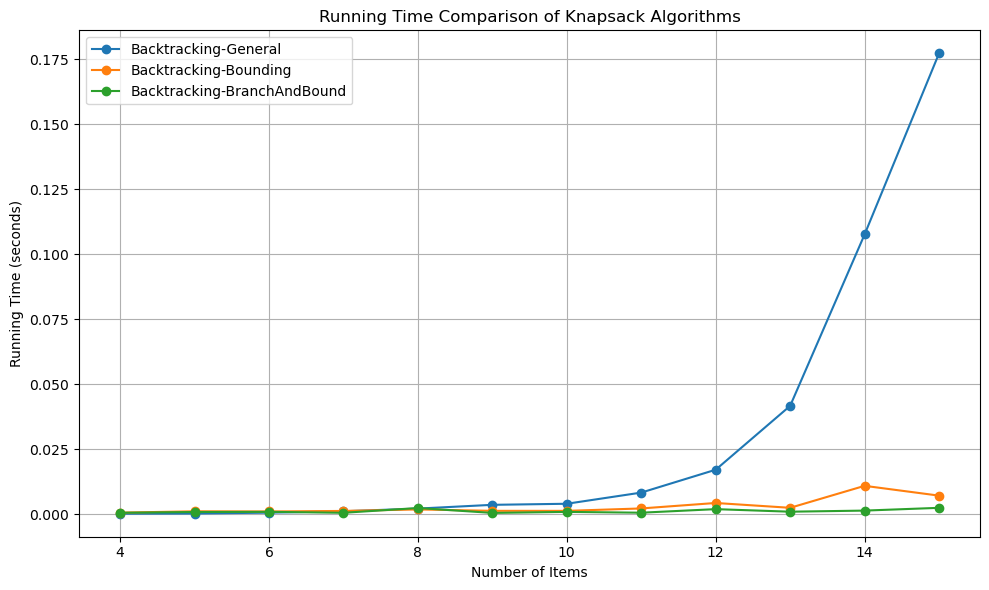

In [100]:
algos = [
    knapsack_general,
    knapsack_bounding,
    knapsack_branchAndBound
]

algoNames = [
    'Backtracking-General',
    'Backtracking-Bounding',
    'Backtracking-BranchAndBound'
]

compare_knapsack_algos( fname, algos, algoNames, True )